# Lab 2: Seven Stages of Data Visualization

## Objective

In this project, we demonstrate the **seven stages of data visualization** as proposed by Ben Fry using a real-world dataset.


## 1. Acquire

We use the Titanic dataset from [Kaggle](https://www.kaggle.com/c/titanic/data), a classic dataset for data science beginners. It contains demographic and survival information of passengers aboard the Titanic.

The dataset is relevant for this task because it includes both categorical and numerical variables, which are suitable for data exploration and visualization.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("data/train_and_test2.csv")
df.head()


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


## 2. Parse

We clean and convert the dataset into a structured format.


In [9]:
# Clean column names and convert types
df.columns = df.columns.str.strip()
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['2urvived'] = df['2urvived'].astype('Int64')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

## 3. Filter

We focus on a subset of relevant features: `Survived`, `Pclass`, `Sex`, `Age`, and `Fare`.

These features are essential for understanding passenger demographics and survival.


In [10]:
# Filtered dataset
filtered_df = df[['2urvived', 'Pclass', 'Sex', 'Age', 'Fare']].dropna()
filtered_df.head()


,2urvived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


## 4. Mine

We explore relationships and statistics in the filtered data.


In [11]:
# Basic EDA
print(filtered_df['2urvived'].value_counts())
print(filtered_df.groupby('Pclass')['Fare'].mean())

# Correlation matrix
filtered_df.corr(numeric_only=True)


2urvived
0    967
1    342
Name: count, dtype: Int64
Pclass
1    87.508992
2    21.179196
3    13.304513
Name: Fare, dtype: float64


,2urvived,Pclass,Sex,Age,Fare
2urvived,1.000000,-0.244686,0.404020,-0.055862,0.173786
Pclass,-0.244686,1.000000,-0.124617,-0.377908,-0.558683
Sex,0.404020,-0.124617,1.000000,-0.053663,0.185681
Age,-0.055862,-0.377908,-0.053663,1.000000,0.178182
Fare,0.173786,-0.558683,0.185681,0.178182,1.000000


## 5. Represent

We visualize the data using three types of plots:
- Bar chart: Survival count by class
- Heatmap: Correlation between features
- Custom plot: Scatter plot of Age vs. Fare colored by Survival


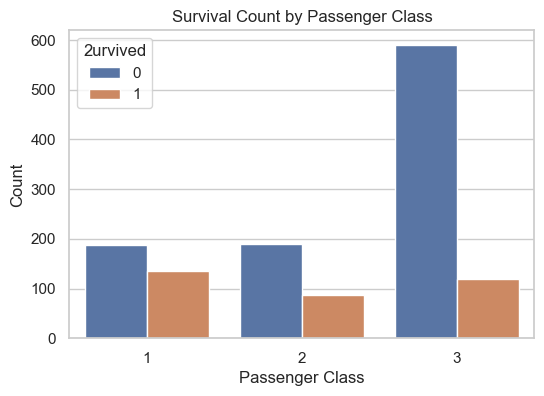

In [12]:
# Bar Chart
plt.figure(figsize=(6, 4))
sns.countplot(data=filtered_df, x='Pclass', hue='2urvived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


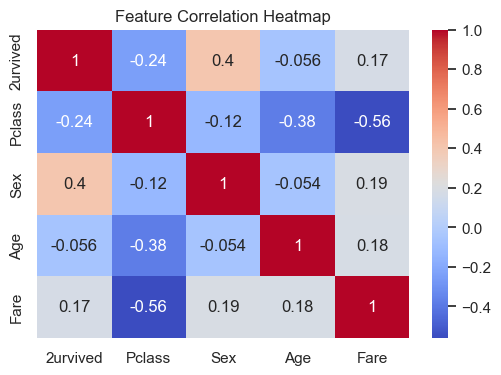

In [13]:
# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(filtered_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


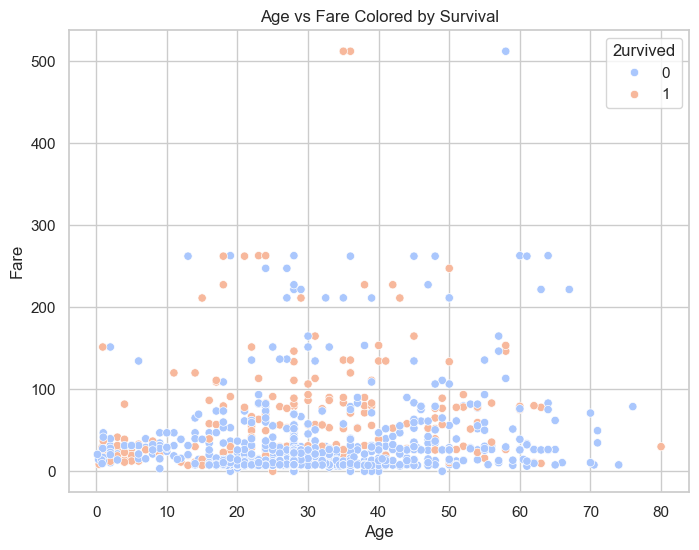

In [15]:
# Custom Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='Age', y='Fare', hue='2urvived', palette='coolwarm')
plt.title('Age vs Fare Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


## 6. Refine

We refine the scatter plot with better formatting and a colorblind-friendly palette.


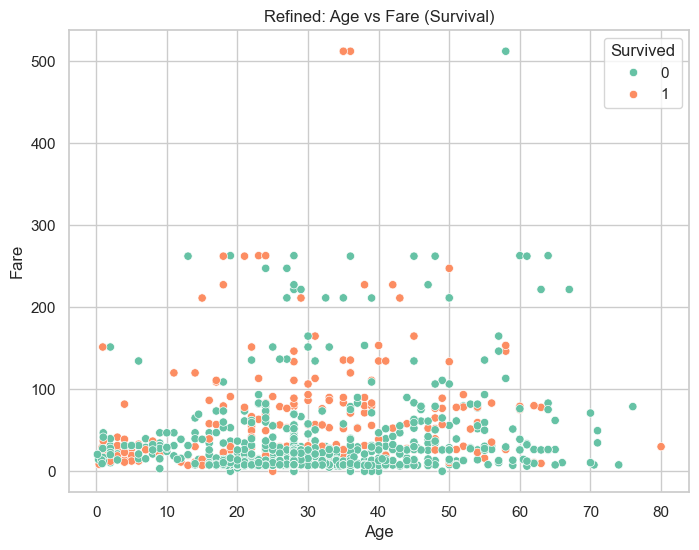

In [17]:
# Refined Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='Age', y='Fare', hue='2urvived', palette='Set2')
plt.title('Refined: Age vs Fare (Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.legend(title='Survived')
plt.show()


## 7. Interact

Use widgets to dynamically explore Age vs Fare by survival status.


In [31]:

import ipywidgets as widgets
from IPython.display import display


survived_dropdown = widgets.Dropdown(
    options=df["2urvived"].unique(),
    description="2urvived:"
)

def show_survived_data(survived):
    display(df[df["2urvived"] == survived].head())

# Interactive widget
widgets.interact(show_survived_data, survived=survived_dropdown)

interactive(children=(Dropdown(description='2urvived:', options=(np.int64(0), np.int64(1)), value=np.int64(0))…

<function __main__.show_survived_data(survived)>